In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv("../data/processed/cleaned_data.csv")

In [2]:
df["Month"] = pd.cut(df["tenure"], bins=12, labels=False)

monthly = df.groupby("Month").agg({
    "customerID": "count",
    "Churn": "sum",
    "MonthlyCharges": "mean"
}).reset_index()

monthly.columns = ["Month", "Active_Customers", "Churned", "Avg_Monthly_Charges"]
monthly["Revenue"] = monthly["Active_Customers"] * monthly["Avg_Monthly_Charges"]

monthly

,Month,Active_Customers,Churned,Avg_Monthly_Charges,Revenue
0,0,1481,NoYesYesYesYesYesNoNoNoYesNoYesNoNoNoYesNoYesN...,54.738656,81067.95
1,1,705,YesNoYesNoYesNoYesYesNoNoNoYesNoYesYesNoYesNoY...,58.952908,41561.80
2,2,548,NoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoN...,61.236131,33557.40
3,3,476,NoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoY...,61.496744,29272.45
4,4,431,YesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYe...,63.929698,27553.70
5,5,401,NoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNo...,67.344389,27005.10
6,6,379,NoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNo...,65.610158,24866.25
7,7,383,NoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYes...,67.018930,25668.25
8,8,420,YesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYes...,70.039286,29416.50
9,9,412,NoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoYe...,71.072209,29281.75


In [3]:
model = ARIMA(monthly["Revenue"], order=(1,1,1))
fit = model.fit()

forecast = fit.forecast(steps=6)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


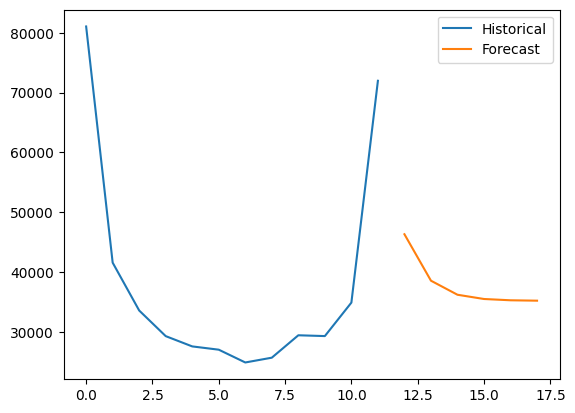

In [ ]:
plt.plot(monthly["Revenue"], label="Historical")
plt.plot(range(len(monthly), len(monthly)+6), forecast, label="Forecast")
plt.legend()
plt.show()
plt.savefig("../reports/figures/filename.png", bbox_inches="tight")

In [5]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly["Revenue"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 2.509116785909278
p-value: 0.9990527314494778


In [6]:
monthly["Revenue_diff"] = monthly["Revenue"].diff()
monthly = monthly.dropna()

In [7]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly["Revenue"], order=(1,1,1))
fit = model.fit()

print(fit.summary())

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\sit

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -108.186
Date:                Sat, 28 Feb 2026   AIC                            222.373
Time:                        00:48:29   BIC                            223.280
Sample:                             0   HQIC                           221.377
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9994      0.093    -10.804      0.000      -1.181      -0.818
ma.L1          0.9925      0.654      1.518      0.129      -0.289       2.274
sigma2      1.413e+08   4.98e-09   2.84e+16      0.0

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


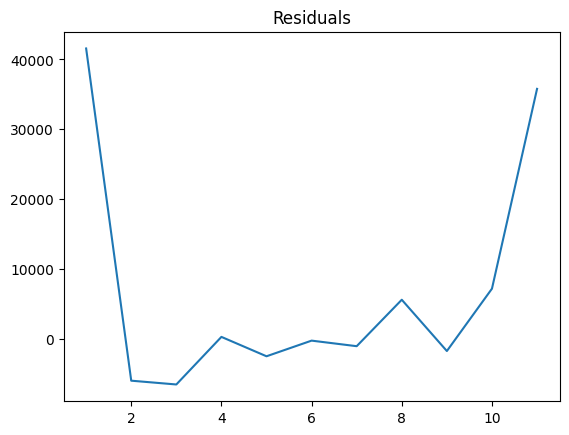

In [ ]:
residuals = fit.resid

plt.plot(residuals)
plt.title("Residuals")
plt.show()
plt.savefig("../reports/figures/filename.png", bbox_inches="tight")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


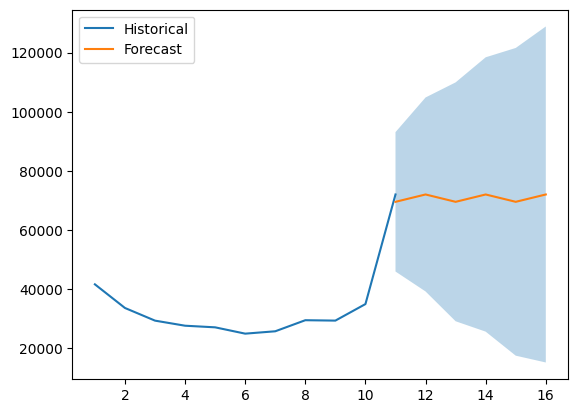

In [ ]:
forecast_result = fit.get_forecast(steps=6)

forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

plt.plot(monthly["Revenue"], label="Historical")
plt.plot(range(len(monthly), len(monthly)+6), forecast, label="Forecast")

plt.fill_between(
    range(len(monthly), len(monthly)+6),
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    alpha=0.3
)

plt.legend()
plt.show()
plt.savefig("../reports/figures/filename.png", bbox_inches="tight")

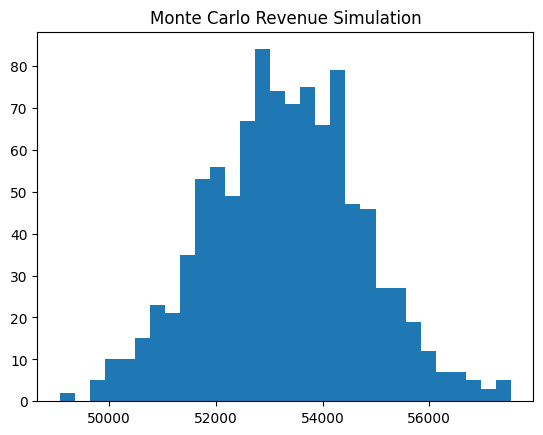

Expected Revenue: 53294.39304325704
Worst Case (5th percentile): 50917.43681801487


In [ ]:
import numpy as np

simulations = 1000
forecast_horizon = 6

simulated_revenue = []

for i in range(simulations):
    churn_variation = np.random.normal(0.26, 0.02)
    revenue_sim = monthly["Revenue"].iloc[-1] * (1 - churn_variation)
    simulated_revenue.append(revenue_sim)

plt.hist(simulated_revenue, bins=30)
plt.title("Monte Carlo Revenue Simulation")
plt.show()

print("Expected Revenue:", np.mean(simulated_revenue))
print("Worst Case (5th percentile):", np.percentile(simulated_revenue, 5))
plt.savefig("../reports/figures/filename.png", bbox_inches="tight")